## 06-Data-Visualization-with-PyViz - Day 2 - Plotly Express, Mapbox API

### Class Objectives

* Compose visualizations using Plotly Express and the Mapbox API.
* Construct map plot visualizations.
* Interact with the geospatial visualizations created with Plotly Express and the Mapbox API.
* Create visualizations that consits of multiple plots.
* Style plots with titles, labels, yformatter, hover colors etc.

### Resources:
* [Plotly Express](https://plotly.com/python/plotly-express/)
* [Mapbox API](https://docs.mapbox.com/api/overview/)


### Install:
`Only if you have any installation issues`
* `conda deactivate`
* `conda install ipykernel`
* `conda create -n pyvizenv python=3.7 anaconda -y`
* `conda activate pyvizenv`
* `conda install -c plotly plotly=4.13. -y`
* `conda install -c pyviz hvplot -y`
* `conda install nodejs -y`
* `conda install streamz -y`
* `pip install python-dotenv`
* `jupyter labextension install jupyterlab-plotly@4.13.0`
* `jupyter labextension install @jupyter-widgets/jupyterlab-manager plotlywidget@4.13.0`
* `jupyter labextension install @pyviz/jupyterlab_pyviz`
* `jupyter lab build`
* `conda list plotly`
* `conda list hvplot`

### API Keys:
* Sign-up for free [Mapbox](https://account.mapbox.com/auth/signup/) account

  - Copy your API Keys from [`Mapbox` Account](https://account.mapbox.com/) and add it to your .env file using:

```
    Mapbox
    MAPBOX_API_ACCESS_TOKEN = "Your_Mapbox_API_access_token_here"
```

# ================================

### 2.01 Instructor Do: Mapbox API Demo (10 min)

## Import the required libraries and dependencies

In [1]:
import plotly.express as px
import pandas as pd
import os
from pathlib import Path

from dotenv import load_dotenv

### Prep the Mapbox API Access Token

In [2]:
# Read the Mapbox API access token from the .env file
load_dotenv()
mapbox_api_access_token = os.getenv("MAPBOX_API_ACCESS_TOKEN")

# Confirm that the mapbox_api_access_token is available
if not mapbox_api_access_token:
    print("Error with the Mapbox API access token. Check the .env file.")

Python-dotenv could not parse statement starting at line 1


In [3]:
# Set the Mapbox API access token
px.set_mapbox_access_token(mapbox_api_access_token)

### Prepare the DataFrame

In [4]:
# Read in the population_counts.csv file into a DataFrame
population_df = pd.read_csv(
    Path("01-Ins_Mapbox_Demo/Resources/population_counts.csv")
).drop_duplicates()

# Review the DataFrame
display(population_df.head())
display(population_df.tail())


Year StateAbbr StateDesc    CityName  PopulationCount   Latitude  Longitude
0  2016        AL   Alabama  Birmingham           212237  33.527566 -86.798817
2  2016        AL   Alabama  Birmingham             3042  33.579433 -86.722832
3  2016        AL   Alabama  Birmingham             2735  33.542821 -86.752434
4  2016        AL   Alabama  Birmingham             3338  33.563245 -86.764047
5  2016        AL   Alabama  Birmingham             2864  33.544240 -86.774913

Year StateAbbr StateDesc  CityName  PopulationCount   Latitude  \
809610  2015        WY   Wyoming  Cheyenne             3961  41.158506   
809611  2015        WY   Wyoming  Cheyenne             1913  41.171776   
809612  2015        WY   Wyoming  Cheyenne             3312  41.160374   
809613  2015        WY   Wyoming  Cheyenne             4518  41.150634   
809614  2015        WY   Wyoming  Cheyenne              214  41.133617   

         Longitude  
809610 -104.777632  
809611 -104.788212  
809612 -104.756561  
809613 -104.755676  
809614 -104.719054

In [5]:
# Filter the DataFrame to include only New York state data
ny_data = population_df[population_df["StateDesc"] == "New York"]

# Review the DataFrame
display(ny_data.head())
display(ny_data.tail())


Year StateAbbr StateDesc CityName  PopulationCount   Latitude  \
483854  2016        NY  New York   Albany             2393  42.660364   
483858  2016        NY  New York   Albany            97856  42.666397   
483860  2016        NY  New York   Albany             2139  42.668922   
483861  2016        NY  New York   Albany             6046  42.664413   
483862  2016        NY  New York   Albany             5888  42.680903   

        Longitude  
483854 -73.765214  
483858 -73.798683  
483860 -73.736313  
483861 -73.751504  
483862 -73.782682

Year StateAbbr StateDesc CityName  PopulationCount   Latitude  \
552713  2015        NY  New York  Yonkers             1687  40.932726   
552714  2015        NY  New York  Yonkers             3356  40.926716   
552715  2015        NY  New York  Yonkers             5397  40.919680   
552716  2015        NY  New York  Yonkers             2689  40.923546   
552717  2015        NY  New York  Yonkers             2947  40.927029   

        Longitude  
552713 -73.854729  
552714 -73.844803  
552715 -73.850542  
552716 -73.855661  
552717 -73.861232

In [6]:
# Create a DataFrame consisting of the CityName, PopulationCount, Latitude and Longitude columns
ny_plot_df = ny_data[["CityName", "PopulationCount", "Latitude", "Longitude"]]

# Review the DataFrame
ny_plot_df.head()

CityName  PopulationCount   Latitude  Longitude
483854   Albany             2393  42.660364 -73.765214
483858   Albany            97856  42.666397 -73.798683
483860   Albany             2139  42.668922 -73.736313
483861   Albany             6046  42.664413 -73.751504
483862   Albany             5888  42.680903 -73.782682

In [7]:
# Aggregate Population Count by CityName
ny_plot_df.groupby('CityName').sum()

PopulationCount       Latitude      Longitude
CityName                                                   
Albany                 391424    2303.679834   -3984.343100
Buffalo               1045240    6865.515498  -12615.879974
Mount Vernon           269168    1718.361217   -3100.942100
New Rochelle           308248    1309.434711   -2361.113032
New York             32700532  174347.556785 -316506.826218
Rochester              842260    7251.631927  -13038.413050
Schenectady            264540    1797.846419   -3105.129062
Syracuse               580680    4906.963147   -8680.587265
Yonkers                783904    4257.731195   -7682.499631

### Plot data

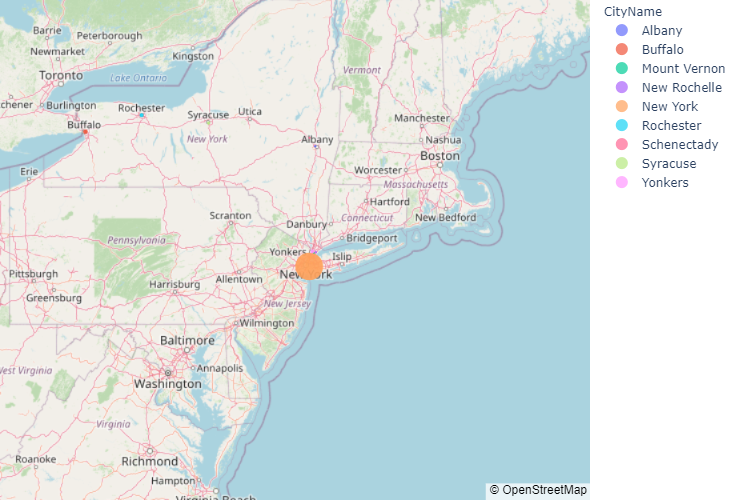

In [12]:
# Plot the data using the Mapbox API
map_plot = px.scatter_mapbox(
    ny_plot_df,
    lat="Latitude",
    lon="Longitude",
    size="PopulationCount",
    color="CityName",
    height=500, 
    zoom=5
)
map_plot.update_layout(mapbox_style="open-street-map")
map_plot.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
# Display the map
map_plot.show()

# ================================

### 2.02 Students Do: Mapping Adventures (15 min)

It's time to take a break from your day job and to plan an adventure!

Your friends have decided to plan a trip to New York City, and you're all looking forward to the time away from the office. In order to plan for the event, you started doing some research regarding points of interest. You've found one dataset that lists a bunch of cool places to see.

Use **Plotly Express** and the **Mapbox API** to create a geographical plots that will visualize each area of interest within the city.

### Instructions

1. Create a .env file to hold your **Mapbox API access token**. Use the function provided to confirm that the token is available for use in the pro

2. Read in the Mapbox API access token using the `os.getenv` function, and use the function provided to confirm that the token is available for use in the program. Finally, set your Mapbox API access token as the parameter in the `px.set_mapbox_access_token` function.

3. Read in the `nyc_places_interest.csv` file from the Resources folder into a Pandas DataFrame. Drop any rows that contain missing data or NaN values.

4. Use the Plotly Express `scatter_mapbox` function to plot all of the places of interest, setting the color to **Name**.

5. Use `scatter_mapbox` to plot places of interest by **PlaceType**.

6. Plot places of interest by **Borough**.

7. Plot **parks** that are of interest.

8. Plot **gardens** that are of interest.

9. Plot **squares** that are of interest.

10. **Challenge** Select just two locations from the `places_of_interest` DataFrame and plot them on a scatter plot map.

  > Hint: Use the Pandas [`isin` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html) to reference a list containing the names of the two locations, as specified in the "Name" column, that you would like to visit.


### Hint

Creating too many map plots in one notebook might create a memory issue. Consider creating a separate notebook for the challenge section. This will require you to read the CSV data in both notebooks.

It's time to take a break from your day job and plan an adventure!

Use **Plotly Express** and the **Mapbox API** to create a series of geographical plots that will visualize each area of interest within the city.

## Import the required libraries and dependencies

In [9]:
import pandas as pd
import plotly.express as px
import os
from pathlib import Path
from dotenv import load_dotenv

1. Create a .env file to hold your Mapbox API Access Token



2. Read in the Mapbox API access token using the `os.getenv` function. Use the function provided to confirm that the token is available for use in the program. Finally, set your Mapbox API access token as the parameter in the `px.set_mapbox_access_token` function.

In [10]:
# Set up API credentials
# Read the Mapbox API access token
# YOUR CODE HERE

load_dotenv()

# Confirm that the mapbox_api_access_token is available
if not mapbox_api_access_token:
    print("Error with the Mapbox API access token. Check the .env file.")
    

Python-dotenv could not parse statement starting at line 1


In [11]:
# Set the Mapbox API access token
# YOUR CODE HERE

api_token = os.getenv('mapbox_api_access_token')


In [12]:
type(api_token)

str

In [13]:
px.set_mapbox_access_token('mapbox_api_access_token')

In [14]:
# Read the the ny_places_interest.csv file into a DataFrame
places_of_interest = pd.read_csv(
    Path("02-Stu_Mapping_Adventures/Resources/nyc_places_interest.csv")
).dropna()

# Review the DataFrame
# YOUR CODE HERE
display(places_of_interest.head())

Id  Longitude   Latitude                Name PlaceType Borough
0  90 -73.888958  40.896210  Van Cortlandt Park      Park   Bronx
1  95 -73.871651  40.889879   Woodlawn Cemetery  Cemetery   Bronx
2  81 -73.838642  40.886965    Seton Falls Park      Park   Bronx
3  69 -73.809802  40.877986     Pelham Bay Park      Park   Bronx
4   8 -73.878308  40.864424    Botanical Garden    Garden   Bronx

In [15]:
display(places_of_interest.tail())

Id  Longitude   Latitude  \
90  73 -74.005553  40.672047   
91  80 -73.898472  40.764449   
92  75 -73.916829  40.892306   
94  87 -73.865019  40.645828   
95  86 -73.844211  40.646316   

                                                 Name PlaceType   Borough  
90                                      Red Hook Park      Park  Brooklyn  
91                           Saint Michael's Cemetery  Cemetery    Queens  
92                                     Riverdale Park      Park     Bronx  
94               Spring Creek Park Preserve No Access      Park  Brooklyn  
95  Spring Creek Park Gateway National Recreation ...      Park    Queens

## Plot the NYC Places of Interest

4. Plot All Places of Interest by Name

In [16]:
# Plot all of the NYC places of interest
# Set the color parameter to Name

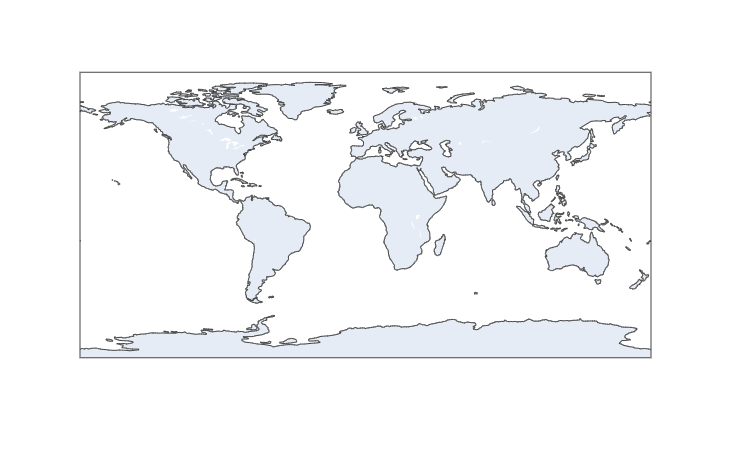

In [17]:
places_of_interest_by_name = px.scatter_geo(
    places_of_interest,
    color = 'Name' 
)

# Show the plot
places_of_interest_by_name

In [18]:
places_of_interest_by_name = px.scatter_mapbox(
    places_of_interest,
    lat = "Latitude",
    lon = "Longitude",
    color = "Name",
    
)

# Show the plot
# YOUR CODE HERE
places_of_interest_by_name

5. Plot All Places of Interest by Place Type

In [19]:
# Plot all of the NYC places of interest
# Set the color parameter to PlaceType
places_of_interest_by_place_type = # YOUR CODE HERE

# Show the plot
# YOUR CODE HERE

SyntaxError: invalid syntax (<ipython-input-19-1bcb8145029f>, line 3)

6. Plot All Places of Interest by Borough

In [ ]:
# Plot all of the NYC places of interest
# Set the color parameter to Borough
places_of_interest_by_borough = # YOUR CODE HERE

# Show the plot
# YOUR CODE HERE

7. Plot Parks of Interest

In [ ]:
# Create a DataFrame that slices the places_of_intereset DataFrame to include only parks
parks = # YOUR CODE HERE

# Plot all of the parks in NYC
# What column should color be set equal to?
parks_of_interest = # YOUR CODE HERE

# Show the plot
parks_of_interest.show()

8. Plot Gardens of Interest

In [ ]:
# Create a DataFrame that slices the places_of_intereset DataFrame to include only gardens
gardens = # YOUR CODE HERE

# Plot all of the gardens in NYC
gardens_of_interest = # YOUR CODE HERE

# Show the plot
gardens_of_interest.show()

9. Plot Squares of Interest

In [ ]:
# Create a DataFrame that slices the places_of_intereset DataFrame to include only squares
squares = # YOUR CODE HERE

# Plot all of the gardens in NYC
squares_of_interst = # YOUR CODE HERE

# Show the plot
squares_of_interst.show()

10. Chllenge - Pick two place of interest and plot them both on a the map

In [ ]:
# Slice the name of two places from the places_of_interest DataFrame
# Use the Pandas isin function to reference the specific name of a location
two_places = # YOUR CODE HERE

# Create the Plot for just the two places
two_places_route = # YOUR CODE HERE

# Show the plot
two_places_route.show()

# ================================

### 2.03 Students Do: A Cartographer's Expedition (20 min)

You and your friends have decided to tackle NYC old school! No cell phones or GPS devices allowed. Although everyone is a bit nervous,  you realize that using an actual map might be pretty cool.

Instead of spending money on a map of NYC, become a true, modern cartographer and create interactive map plots that can be used by you and your friends to get the lay of the city.

Using the CSV file provided, your goal is to generate a map that plots between five and six locations in the city.  Plotly Express and Mapbox should be used to plot the route (point A to point B to point C) for the expedition.

## Instructions

1. Create a .env file to hold your **Mapbox API access token**.

2. Read in the Mapbox API access token using the `os.getenv` function. Use the function provided to confirm that the token is available for use in the program. Finally, set your Mapbox API access token as the parameter in the `px.set_mapbox_access_token` function.

3. Read in the `nyc_excursion_plans.csv` file in to a Pandas DataFrame. Drop any rows that contain missing data or NaN values.

4. Slice data for your **arriving airport** and the **first** location the group will visit.

  > Hint: You can use either or both of the Pandas [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html) or [`isin`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html) functions to access the names of the locations you intend to visit.

5. Now create a plot that includes your second and third location. Be sure to include your first stop so that you know how to get to the second.

6. Now create a plot that includes your fourth and fifth location. Be sure to include your third stop so that you know how to get where you are going.

7. Plot all locations on one map. What is the order in which you should visit them to get you back to the airport most efficiently?

### Challenge

If there are places in NYC that you'd like to visit and you know their geospatial details (latitude and longitude), feel free to add them to the data file. Be careful not to corrupt the data file.

If you do corrupt the file, re-download the data and start again.

You and your friends have decided to tackle NYC old school! No cell phones or GPS devices allowed. Although everyone is a bit nervous,  you realize that using an actual map might be pretty cool.

Your goal is to generate a map that plots your between five and six locations in the city.  Plotly Express and Mapbox should be used to plot the route (point A to point B to point C) for the expedition.

## Import the required libraries and dependencies

In [ ]:
import pandas as pd
import plotly.express as px
import os
from pathlib import Path
from dotenv import load_dotenv

1. Create a .env file to hold your Mapbox API Access Token

2. Read in the Mapbox API access token using the `os.getenv` function. Use the function provided to confirm that the token is available for use in the program. Finally, set your Mapbox API access token as the parameter in the `px.set_mapbox_access_token` function.

In [20]:
# Set up API credentials
# Read the Mapbox API access token
# YOUR CODE HERE
map_box_api_access_token = os.getenv("MAPBOX_API_ACCESS_TOKEN")

# Confirm that the mapbox_api_access_token is available
if not mapbox_api_access_token:
    print("Error with the Mapbox API access token. Check the .env file.")
    

In [21]:
# Set the Mapbox API access token
# YOUR CODE HERE

px.set_mapbox_access_token(map_box_api_access_token)

load_dotenv()

Python-dotenv could not parse statement starting at line 1


True

In [22]:
type('map_box_api_access_token')

str

3. Read in the `nyc_excursion_plans.csv` file into a Pandas DataFrame. Drop any rows that contain missing data or NaN values.

In [23]:
# Read the the ny_places_interest.csv file into a DataFrame
nyc_excursion_plans = pd.read_csv(
    Path('03-Stu_Cartographers_Expedition/Resources/nyc_excursion_plans.csv')
).dropna()

# Review the DataFrame
# YOUR CODE HERE


display(nyc_excursion_plans.head())

Id  Longitude   Latitude                Name PlaceType Borough
0  90 -73.888958  40.896210  Van Cortlandt Park      Park   Bronx
1  95 -73.871651  40.889879   Woodlawn Cemetery  Cemetery   Bronx
2  81 -73.838642  40.886965    Seton Falls Park      Park   Bronx
3  69 -73.809802  40.877986     Pelham Bay Park      Park   Bronx
4   8 -73.878308  40.864424    Botanical Garden    Garden   Bronx

In [ ]:
display(nyc_excursion_plans.tail())

4. Slice the DataFrame to include the arrival airport and first location

In [ ]:
# Create a DataFrame with the arriving Airport and the first location you will visit
arrival_and_first_location = # YOUR CODE HERE

# Plot the arriving airport and the first location
first_route = # YOUR CODE HERE


# Show the plot
first_route.show()

5. Plot the route between your first, second and third locations.

In [ ]:
# Plot the route between the first second and third locations
first_second_third_locations = # YOUR CODE HERE

# Create the plot including your first, second and third locations
second_route = # YOUR CODE HERE

# Show the Plot
second_route.show()

6. Plot the route between your third, fourth, and fifth locations.

In [ ]:
## Plot the route between your third, fourth, and fifth locations.
third_fourth_fifth_locations = # YOUR CODE HERE

# Create the plot including your third, fourth and fifth locations
third_route = # YOUR CODE HERE

# Show the Plot
third_route.show()

7. Plot all the stops in your excursion

In [ ]:
# Plot course for all of the stops in your excursion, including the airport
all_stops = # YOUR CODE HERE

# Create the plot that shows all of you stops
plot_all_stops = # YOUR CODE HERE

# Show the Plot
plot_all_stops.show()

**Question** Given the location of the stops on your excursion, what is the order in which you should visit them to get you back to the airport most efficiently?

**Answer** Given the stops listed, the most efficient visiting order is: Juniper Valley Park, Madison Square Garden, Ellis Island, Liberty Island, and finally Aqueduct Race Track, which is closest to the airport to ensure traffic does not prevent us from making the flight home!

# ================================

### 2.04 Instructor Do: Composing Plots (10 min)

In [13]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
from pathlib import Path

## Prepare the Hospital Claims DataFrame

In [14]:
# Read in hospital_claims.csv file as a Pandas DataFrame
hospital_data = pd.read_csv(Path("04-Ins_Composing_Plots/Resources/hospital_claims.csv"))

# Review the DataFrame
hospital_data.head()

DRG Definition  Provider Id  \
0  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10001   
1  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10005   
2  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10006   
3  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10011   
4  039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10016   

                      Provider Name     Provider Street Address Provider City  \
0  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE        DOTHAN   
1     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH          BOAZ   
2    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET      FLORENCE   
3                 ST VINCENT'S EAST  50 MEDICAL PARK EAST DRIVE    BIRMINGHAM   
4     SHELBY BAPTIST MEDICAL CENTER     1000 FIRST STREET NORTH     ALABASTER   

  Provider State  Provider Zip Code Hospital Referral Region Description  \
0             AL              36301                          AL - Dothan   
1             AL              35957                      AL - Birmingham   
2             AL              35631                      AL - Birmingham   
3             AL              35235                      AL - Birmingham   
4             AL              35007                      AL - Birmingham   

   Total Discharges  Average Covered Charges  Average Total Payments  \
0                91                 32963.07                 5777.24   
1                14                 15131.85                 5787.57   
2                24                 37560.37                 5434.95   
3                25                 13998.28                 5417.56   
4                18                 31633.27                 5658.33   

   Average Medicare Payments  
0                    4763.73  
1                    4976.71  
2                    4453.79  
3                    4129.16  
4                    4851.44

In [15]:
# Slice the DataFrame to consist of only "552 - MEDICAL BACK PROBLEMS W/O MCC" information
procedure_552_charges = hospital_data[
    hospital_data["DRG Definition"] == "552 - MEDICAL BACK PROBLEMS W/O MCC"
]

# Review the DataFrame
procedure_552_charges.head()

DRG Definition  Provider Id  \
118109  552 - MEDICAL BACK PROBLEMS W/O MCC        50128   
118137  552 - MEDICAL BACK PROBLEMS W/O MCC        50764   
118355  552 - MEDICAL BACK PROBLEMS W/O MCC        60001   
118383  552 - MEDICAL BACK PROBLEMS W/O MCC       100009   
120657  552 - MEDICAL BACK PROBLEMS W/O MCC       100012   

                         Provider Name Provider Street Address Provider City  \
118109         TRI-CITY MEDICAL CENTER          4002 VISTA WAY     OCEANSIDE   
118137  SHASTA REGIONAL MEDICAL CENTER           1100 BUTTE ST       REDDING   
118355   NORTH COLORADO MEDICAL CENTER        1801 16TH STREET       GREELEY   
118383    UNIVERSITY OF MIAMI HOSPITAL        1400 NW 12TH AVE         MIAMI   
120657           LEE MEMORIAL HOSPITAL      2776 CLEVELAND AVE    FORT MYERS   

       Provider State  Provider Zip Code Hospital Referral Region Description  \
118109             CA              92056                       CA - San Diego   
118137             CA              96001                         CA - Redding   
118355             CO              80631                         CO - Greeley   
118383             FL              33136                           FL - Miami   
120657             FL              33901                      FL - Fort Myers   

        Total Discharges  Average Covered Charges  Average Total Payments  \
118109                14                 26610.85                 5970.57   
118137                29                 36127.31                 6305.17   
118355                48                 20543.02                 5454.12   
118383                37                 40265.86                 6362.72   
120657                83                 20712.84                 4889.45   

        Average Medicare Payments  
118109                    5007.14  
118137                    5219.93  
118355                    4252.91  
118383                    5466.67  
120657                    3755.37

## Slice data for Average Total Payments by State

In [17]:
# Group data by state and average total payments, and then sum the values
payments_by_state = procedure_552_charges[["Average Total Payments", "Provider State"]]

# Sum the average total payments by state
total_payments_by_state = payments_by_state.groupby("Provider State").sum()

# Review the DataFrame
total_payments_by_state.head()

Average Total Payments
Provider State                        
AK                             7134.40
AL                           149613.29
AR                           116147.95
AZ                           151868.43
CA                          1068146.26

### Create the plot objects

In [18]:
# Plot data using hvplot.bar
total_payments_by_state.hvplot.bar()

:Bars   [Provider State]   (Average Total Payments)

In [19]:
# Sort the state data values by Average Total Paymnts
sorted_total_payments_by_state = total_payments_by_state.sort_values("Average Total Payments")

# Plot the sorted data
sorted_total_payments_by_state.hvplot()

:Curve   [Provider State]   (Average Total Payments)

## Compose side-by-side plots using the + operator

In [20]:
# Compose plots using + operator. 
total_payments_by_state.hvplot.bar() + sorted_total_payments_by_state.hvplot()

:Layout
   .Bars.I  :Bars   [Provider State]   (Average Total Payments)
   .Curve.I :Curve   [Provider State]   (Average Total Payments)

In [21]:
# We prevent this by renaming the index in one of the dataframes before plotting them.
sorted_total_payments_by_state.index.names = ['Provider State Sorted']

total_payments_by_state.hvplot.bar() + sorted_total_payments_by_state.hvplot()

:Layout
   .Bars.I  :Bars   [Provider State]   (Average Total Payments)
   .Curve.I :Curve   [Provider State Sorted]   (Average Total Payments)

## Slice data for Average Medicare Payments by State

In [22]:
# Group data by state and average medicare payments, and then sum the values
medicare_payment_by_state = procedure_552_charges[["Average Medicare Payments", "Provider State"]]

total_medicare_by_state = medicare_payment_by_state.groupby("Provider State").sum()

total_medicare_by_state.head()

Average Medicare Payments
Provider State                           
AK                                6008.80
AL                              112154.39
AR                               90176.26
AZ                              120926.12
CA                              901778.32

In [24]:
# Sort data values
sorted_total_medicare_by_state = total_medicare_by_state.sort_values("Average Medicare Payments")

sorted_total_medicare_by_state.hvplot.bar(rot=90)

:Bars   [Provider State]   (Average Medicare Payments)

## Compose overlay plots using the + operator

In [50]:
# Overlay plots of different type using * operator
sorted_total_payments_by_state.hvplot.line(label="Average Total Payments", rot=90) * sorted_total_medicare_by_state.hvplot.bar(label="Average Medicare Payments")

:Overlay
   .Curve.Average_Total_Payments   :Curve   [Provider State Sorted]   (Average Total Payments)
   .Bars.Average_Medicare_Payments :Bars   [Provider State]   (Average Medicare Payments)

In [49]:
# Overlay plots of the same type using * operator
sorted_total_payments_by_state.hvplot.bar(label="Average Total Payments") * sorted_total_medicare_by_state.hvplot.bar(label="Average Medicare Payments")

:Overlay
   .Bars.Average_Total_Payments    :Bars   [Provider State Sorted]   (Average Total Payments)
   .Bars.Average_Medicare_Payments :Bars   [Provider State]   (Average Medicare Payments)

# ================================

### 2.05 Students Do: Composing Masterpieces (10 min)

In your role as a data analyst for a video streaming service, you have been asked by your manager to compare and contrast the subscriber data for various international regions over the last several years.

The continued growth of you firm is dependant on the number of subcribers to the service. You manager has asked you to review the rates of growith in subscriber numbers across time to help determine when their marketing dollars are best focused.

Use your knowledge of compose and overlay plots to create visualizations to gather the data requested by your manager.

## Instructions

1. Open the [starter file](05-Stu_Composing_Masterpieces/Unsolved/composing_masterpieces.ipynb), and create a Pandas DataFrame from the "subscriber_numbers.csv" file that is located in the Resources folder.

2. Using both a compose plot and and overlay plot, compare the subscriber numbers for each region for the periods "Q1 - 2018", "Q1 - 2019", and "Q1-2020".  How does the rate of growth compare across each region over the time periods being analyzed?

3. Using both a compose plot and and overlay plot, combare the time series trends in subscriber numbers for the two largest regions detailed in the dataset, the "United States and Canada" region and the "Europe, Middle East and Africa" region. How does the rate of growth over the time series compare across the two regions?

4. Given the information in these visualizations, toward what region would you recommend that advertising dollars be focused?

### Hint

Composing plots of different kinds can help users visualize differences in data points. Consider composing plots of different kinds to help underscore similarities and differences in trends.

Also, remember to leverage labels so that you can clearly identify the information displayed by each plot. This will help users glean better insights from the visualization.

---

In your role as a data analyst for a video streaming service, you have been asked by your manager to compare and contrast the subscriber data for various international regions over the last several years. 

Use your knowledge of compose and overlay plots to create visualizations to gather the data requested by your manager. 

In [ ]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
from pathlib import Path

1. Prepare the Subscriber Numbers DataFrame

In [ ]:
# Read in subscriber_numbers.csv file into a Pandas DataFrame
subscribers_df = pd.read_csv(Path("05-Stu_Composing_Masterpieces/Resources/subscriber_numbers.csv"))

# Review the DataFrame
# YOUR CODE HERE

2. Using both a compose plot and and overlay plot, compare the subscriber numbers for each region for the periods "Q1 - 2018", "Q1 - 2019", and "Q1-2020".

In [ ]:
# Create a DataFrame that slices the subscriber data for Q1 - 2018.
q1_2018 = # YOUR CODE HERE

# Set the index of the DataFrame to Area
q1_2018 = # YOUR CODE HERE

# Create a bar chart of the Q1 - 2018 data
q1_2018_plot = # YOUR CODE HERE

# Show the bar chart
q1_2018_plot

In [ ]:
# Create a DataFrame that slices the subscriber data for Q1 - 2018.
q1_2019 = # YOUR CODE HERE

# Set the index of the DataFrame to Area
q1_2019 = # YOUR CODE HERE

# Create a bar chart of the Q1 - 2018 data
q1_2019_plot = # YOUR CODE HERE

# Show the bar chart
q1_2019_plot

In [ ]:
# Create a DataFrame that slices the subscriber data for Q1 - 2018.
q1_2020 = # YOUR CODE HERE

# Set the index of the DataFrame to Area
q1_2020 = # YOUR CODE HERE

# Create a bar chart of the Q1 - 2018 data
q1_2020_plot = # YOUR CODE HERE

# Show the bar chart
q1_2020_plot

## Create a compose plot to visualize the Q1 data

In [ ]:
# Create a compose plot to visualize the Q1 data side-by-side
# YOUR CODE HERE

## Create an overlay plot for the Q1 data

> Hint: Does the order of the plots change the visualization?

In [ ]:
# Create an overlay plot to visualize the Q1 data
# YOUR CODE HERE

**Question:** How does the rate of growth compare across each region over the time periods being analyzed?

**Answer:** # YOUR ANSWER HERE

3. Using both a compose plot and and overlay plot, combare the time series trends in subscriber numbers for the two largest regions detailed in the dataset, the "United States and Canada" region and the "Europe, Middle East and Africa" region.

In [ ]:
# Create a DataFrame that slices the subscriber data for the United States and Canada
us_canada_subscribers = # YOUR CODE HERE

# Set the index of the DataFrame to Years
us_canada_subscribers = # YOUR CODE HERE

# Create a line plot of the US and Canada data
us_canada_plot = # YOUR CODE HERE

# Show the plot
us_canada_plot

In [ ]:
# Create a DataFrame that slices the subscriber data for the Europe, Middle East and Africa area
emea_subscribers = # YOUR CODE HERE

# Set the index of the DataFrame to Years
emea_subscribers = # YOUR CODE HERE

# Create a line plot of the US and Canada data
emea_plot = # YOUR CODE HERE

# Show the plot
emea_plot

## Create a compose plot to visualize the subscriber time series data for the two regions

In [ ]:
# Create a compose plot to visualize the subscriber time series data for the two regions
# YOUR CODE HERE

## Create an overlay plot for the subcriber time series data

In [ ]:
# Create an overlay plot to visualize the subscriber time series data for the two regions
# YOUR CODE HERE

**Question:**How does the rate of growth over the time series compare across the two regions?

**Answer:** # YOUR ANSWER HERE  

4. Answer the following question:

**Question:** Given the information in these visualizations, toward what region would you recommend that advertising dollars be focused?

**Answer:** # YOUR ANSWER HERE

# ================================

### 2.06 Instructor Do: Visualization Options (10 min)

In [ ]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
from pathlib import Path

##  Prepare the DataFrame

In [ ]:
# Read in subscriber_numbers.csv file into a Pandas DataFrame
subscribers_df = pd.read_csv(Path("06-Ins_Viz_Options/Resources/subscriber_numbers.csv"))

# Review the DataFrame
subscribers_df.head()

## Create an overlay plo that compares the subscriber numbers for each region for the periods "Q1 - 2018", "Q1 - 2019", and "Q1-2020".

In [ ]:
# Create a DataFrame that slices the subscriber data for Q1 - 2018.
q1_2020 = subscribers_df.loc[subscribers_df['Years'] == 'Q1 - 2020']

# Set the index of the DataFrame to Area
q1_2020 = q1_2020.set_index('Area')

# Create a bar chart of the Q1 - 2018 data
q1_2020['Subscribers'].hvplot.bar()

In [ ]:
# Update the Q1 - 2018 plot with rotation, x- and y-axis labels
q1_2020['Subscribers'].hvplot.bar( 
    xlabel="International Region",
    ylabel="Number of Subscribers",
    rot=30
)

In [ ]:
# Update the Q1 - 2018 data with yformatter
q1_2020['Subscribers'].hvplot.bar( 
    xlabel="International Region",
    ylabel="Number of Subscribers",
    rot=30
).opts(yformatter='%.0f')

In [ ]:
# Update the Q1 - 2018 data with a title
q1_2020['Subscribers'].hvplot.bar( 
    xlabel="International Region",
    ylabel="Number of Subscribers",
    rot=30
).opts(
    yformatter='%.0f',
    title="Subscriber Nubmers by Region - Q1 2020",
)

In [ ]:
# Update the Q1 - 2018 data replacing the title with the label parameter
q1_2020['Subscribers'].hvplot.bar( 
    label="Subscriber Nubmers by Region - Q1 2020",
    xlabel="International Region",
    ylabel="Number of Subscribers",
    rot=30
).opts(
    yformatter='%.0f',
)

In [ ]:
# Update the Q1 - 2018 data with color and hover_color
q1_2020['Subscribers'].hvplot.bar(
    label="Subscriber Nubmers by Region - Q1 2020",
    xlabel="International Region",
    ylabel="Number of Subscribers",
    rot=30
).opts(
    yformatter='%.0f',
    color="purple",
    hover_color="orange"
)

# ================================

### 2.07 Students Do: Picture Perfect (15 min)

Still in your role as a data analyst for a video streaming service, you have now been asked by your manager to compare and contrast the revenue numbers by quarter for the various international regions.

The results of your analysis will be presented at the board meeting so you need to make sure your visualizations are picture perfect.  Using the customization attributes and options demonstrated by the instructor, curate your visualizations. Make sure to assess each plot for opportunities of aesthetic improvement.

Be sure to consult the [HvPlot Customization](https://hvplot.holoviz.org/user_guide/Customization.html) page for additional opportunities of aesthetic improvement.

## Instructions

1. Open the [starter file](07-Stu_Picture_Perfect/Unsolved/picture_perfect.ipynb), and create a Pandas DataFrame from the regional_revenue.csv file that is located in the Resources folder.

2. Create a line plot that visualizes the growth in revenue for the United States and Canada region.

3. Add x- and y-axis labels to your plot. Rotate the x-axis plot ticks 45 degrees.

4. Add a title to the US and Canada revenue plot.

5. Use the yformatter option to format y-axis values.

6. Add a line_color of blue and hover_line_color of yellow to the plot.

7. Save the plot you just created to a variable so that it can eventually be utilized in an overlay plot.

8. Create a line plot that visualizes the growth in revenue for the Europe, Middle East and Africa region. Style it with the same options utilized in the first plot. However, make the line_color equal to orange. Be sure to save this plot to a variable as well.

9. Create an overlay plot for the "United States and Canada" and the "Europe, Middle East and Africa" regions.

10. Add a title to the overlay plot. Additionally, adjust height, width and background color.

    > Hint: The `opts` function can be used customize composite plot (i.e `(plot_state_avgs * plot_2015_2016 * plot_2010_2014).opts(bgcolor="lightgrey")`)

11. If time permits, add stylized line plots for the Asia-Pacific and Latin America regions and include them in the overlay plot.
---

Still in your role as a data analyst for a video streaming service, you have now been asked by your manager to compare and contrast the revenue numbers by quarter for the various international regions.

Be sure to consult the [HvPlot Customization](https://hvplot.holoviz.org/user_guide/Customization.html) page for additional opportunities of aesthetic improvement.

In [ ]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
from pathlib import Path

1. Prepare the Regional Revenue DataFrame

In [ ]:
# Read in regional_revenue.csv file into a Pandas DataFrame
regional_revenue_df = # YOUR CODE HERE

# Review the DataFrame
# YOUR CODE HERE

2. Create a plot that visualizes the growth in revenue for the United States and Canada

In [ ]:
# Create a DataFrame that slices the subscriber data for the United States and Canada
us_canada_revenue = # YOUR CODE HERE

# Set the index of the DataFrame to Years
us_canada_revenue = # YOUR CODE HERE

# Create a line plot of the US and Canada Revenue data
us_canada_revenue['Revenue'].hvplot()

3. Add x- and y-axis labels to your plot. Rotate the x-axis plot ticks 45 degrees.

In [ ]:
# Rotate the x-axis ticks by 45 degrees and add x- and y-axis labels to the plot
# YOUR CODE HERE

4.  Add a title to the US and Canada revenue plot

In [ ]:
# Add a title to your US and Canada revenue plot using the label parameter
# YOUR CODE HERE


5. Use the yformatter option to format the y-axis values.

In [ ]:
# Use the yformatter to adjust the y-axis values
# YOUR CODE HERE

6. Add a line_color of blue and hover_line_color of yellow to the plot.

In [ ]:
# Add a line_color of blue and a hover_line_color of yellow
# YOUR CODE HERE

7. Save the plot you just created to a variable so that it can eventually be utilized in an overlay plot.

In [ ]:
# Save the US and Canada revenue plot to a variable
# YOUR CODE HERE

# Show the plot
us_canada_plot

8. Create a line plot that visualizes the growth in revenue for the Europe, Middle East and Africa region. Style it with the same options utilized in the first plot. However, make the line_color equal to orange. Be sure to save this plot to a variable as well.

In [ ]:
# Create a DataFrame that slices the subscriber data for the Europe, Middle East and Africa
emea_revenue = # YOUR CODE HERE

# Set the index of the DataFrame to Years
emea_revenue = # YOUR CODE HERE

In [ ]:
# Create a styled line plot for the Europe, Middle East Africa region. 
# Make the line_color orange and be sure to set the plot equal to a variable. 
# YOUR CODE HERE

# Show the plot
emea_plot

9. Create an overlay plot for the "United States and Canada" and the "Europe, Middle East and Africa" regions.

In [ ]:
# Create an overlay plot for the two visualizations
# YOUR CODE HERE

10. Add a title to the overlay plot. Additionally, adjust height, width and background color.

In [ ]:
# Adjust the title, height, width and background color of the overlay plot
# YOUR CODE HERE

11. Create line plots for the Latin America and Asia Pacific Regions

In [ ]:
# Create a DataFrame that slices the subscriber data for the Asia-Pacific region
ap_revenue = # YOUR CODE HERE

# Set the index of the DataFrame to Years
ap_revenue = # YOUR CODE HERE

In [ ]:
# Create a styled line plot for the Asia-Pacific region. 
# Make the line_color orange and be sure to set the plot equal to a variable. 
# YOUR CODE HERE  

# Show the plot
ap_plot

In [ ]:
# Create a DataFrame that slices the subscriber data for the Latin America region
lam_revenue = # YOUR CODE HERE

# Set the index of the DataFrame to Years
lam_revenue = # YOUR CODE HERE

In [ ]:
# Create a styled line plot for the Latin America region. 
# Make the line_color orange and be sure to set the plot equal to a variable. 
# YOUR CODE HERE  

# Show the plot
lam_plot

In [ ]:
# Create a compose plot for all four regions
# YOUR CODE HERE

# ================================

### Rating Class Objectives

* rate your understanding using 1-5 method in each objective

In [ ]:
title = "06-Data-Visualization-with-PyViz - Day 2 - Plotly Express, Mapbox API"
objectives = [
    "Compose visualizations using Plotly Express and the Mapbox API",
    "Construct map plot visualizations",
    "Interact with the geospatial visualizations created with Plotly Express and the Mapbox API",
    "Create visualizations that consits of multiple plots",
    "Style plots with titles, labels, yformatter, hover colors etc",
]
rating = []
total = 0
for i in range(len(objectives)):
    rate = input(objectives[i]+"? ")
    total += int(rate)
    rating.append(objectives[i] + ". (" + rate + "/5)")
print("="*96)
print(f"Self Evaluation for: {title}")
print("-"*24)
for i in rating:
    print(i)
print("-"*64)
print("Average: " + str(total/len(objectives)))